# Project Proposal (Washington D.C.)

Principal Investigators: Kylie Barry, Sarah Brown, Jake Lee, Dini Schweikert (Author email: snbrown@wisc.edu)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Get the data from our csv into a usable format

washington_marijuana_arrest = pd.read_csv("Washington.csv")
# For our purposes, columns of interested are limited to the chosen ones below
data1 = washington_marijuana_arrest.filter(['Marijuana_Arrest Type', 'Adult/Juvenile', 'Arrest Year', 'Age',
                                            'Defendant Race', 'Defendant Sex', 'Charge Description'], axis = 1)
data1 = data1.rename(columns = {'Marijuana_Arrest Type':"Arrest Type", 'Arrest Year':'Year'})
data1 = data1.set_index("Year")
data1

,Arrest Type,Adult/Juvenile,Age,Defendant Race,Defendant Sex,Charge Description
Year,,,,,,
2012,Possession,Adult,20,B,F,Ucsa Possession Marijuana
2012,Possession,Adult,23,B,M,Ucsa Possession Marijuana
2012,Possession,Adult,46,B,M,Ucsa Possession Marijuana
2012,Possession,Adult,30,B,M,Ucsa Possession Marijuana
2012,Possession with intent to distribute,Adult,29,U,M,Ucsa Pwid Marijuana
...,...,...,...,...,...,...
2019,Possession with intent to distribute,Juvenile,NaN,NaN,NaN,Poss W/i To Dist Marijuana-misd
2019,Possession with intent to distribute,Juvenile,NaN,NaN,NaN,Poss W/i To Dist Marijuana-fel
2019,Possession with intent to distribute,Juvenile,NaN,NaN,NaN,Poss W/i To Dist Marijuana-misd


In [3]:
# Generate yearly arrest numbers from our dataset

arrest_counts = data1.groupby(['Year']).agg(len)
arrest_counts = arrest_counts.drop(['Adult/Juvenile', 'Age'], axis = 1)
arrest_counts = arrest_counts.rename(columns = {'Arrest Type': 'Total Arrests'})
arrest_counts

,Total Arrests,Defendant Race,Defendant Sex,Charge Description
Year,,,,
2012,3546,3546,3546,3546
2013,2718,2718,2718,2718
2014,2153,2153,2153,2153
2015,323,323,323,323
2016,676,676,676,676
2017,926,926,926,926
2018,1039,1039,1039,1039
2019,840,840,840,840


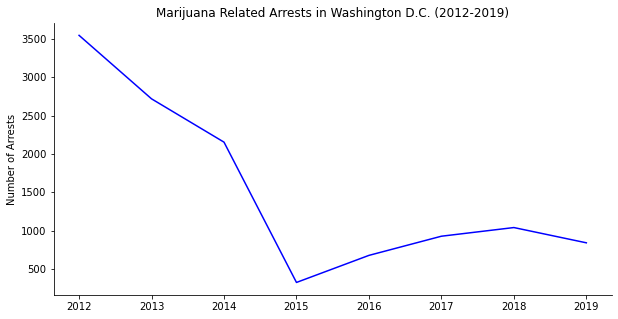

In [4]:
# Plot our calculated yearly arrest data

fig, ax = plt.subplots(figsize = (10,5)) 
ax.plot(arrest_counts.index, arrest_counts["Total Arrests"], color = 'blue')

ax.set_ylabel('Number of Arrests')
ax.set_title('Marijuana Related Arrests in Washington D.C. (2012-2019)')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

In [5]:
# Consolidate data for male arrests

male = data1[data1['Defendant Sex'] == 'M']
male = male.groupby(['Year']).agg(len)
male = male.drop(['Adult/Juvenile', 'Age', 'Defendant Race', 'Defendant Sex', 'Charge Description'], axis = 1)
male = male.rename(columns = {'Arrest Type': 'Total Arrests'})
male

,Total Arrests
Year,
2012,2950
2013,2306
2014,1860
2015,289
2016,593
2017,809
2018,917
2019,749


In [6]:
# Consolidate data for female arrests

female = data1[data1['Defendant Sex'] == 'F']
female = female.groupby(['Year']).agg(len)
female = female.drop(['Adult/Juvenile', 'Age', 'Defendant Race', 'Defendant Sex', 'Charge Description'], axis = 1)
female = female.rename(columns = {'Arrest Type': 'Total Arrests'})
female

,Total Arrests
Year,
2012,426
2013,305
2014,226
2015,24
2016,45
2017,64
2018,90
2019,46


In [7]:
# Consolidate data for arrests with unknown gender

unknown = data1[data1['Defendant Sex'] == 'U']
unknown = unknown.groupby(['Year']).agg(len)
unknown = unknown.drop(['Adult/Juvenile', 'Age', 'Defendant Race', 'Defendant Sex', 'Charge Description'], axis = 1)
unknown = unknown.rename(columns = {'Arrest Type': 'Total Arrests'})
unknown

,Total Arrests
Year,
2012,2
2013,8
2014,9
2015,1
2017,1
2019,3


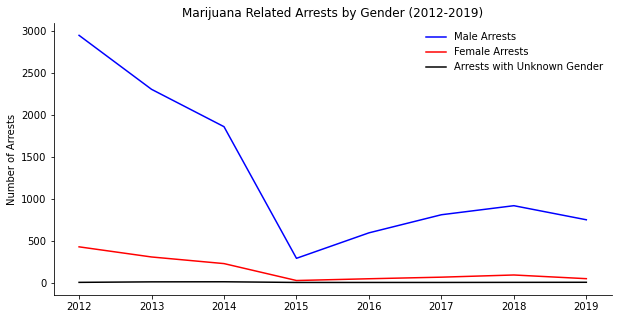

In [9]:
# Plot arrests by gender
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(male.index, male['Total Arrests'], color = 'blue', label = 'Male Arrests')
ax.plot(female.index, female['Total Arrests'], color = 'red', label = 'Female Arrests')
ax.plot(unknown.index, unknown['Total Arrests'], color = 'black', label = 'Arrests with Unknown Gender')

ax.set_title('Marijuana Related Arrests by Gender (2012-2019)')
ax.set_ylabel('Number of Arrests')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend(frameon=False)

plt.show()

In [10]:
# Consolidate data for Asian arrests

asian = data1[data1['Defendant Race'] == 'A']
asian = asian.groupby(['Year']).agg(len)
asian = asian.drop(['Adult/Juvenile', 'Age', 'Defendant Race', 'Defendant Sex', 'Charge Description'], axis = 1)
asian = asian.rename(columns = {'Arrest Type': 'Total Arrests'})
asian

,Total Arrests
Year,
2018,12
2019,1


In [11]:
# Consolidate data for Black arrests

black = data1[data1['Defendant Race'] == 'B']
black = black.groupby(['Year']).agg(len)
black = black.drop(['Adult/Juvenile', 'Age', 'Defendant Race', 'Defendant Sex', 'Charge Description'], axis = 1)
black = black.rename(columns = {'Arrest Type': 'Total Arrests'})
black

,Total Arrests
Year,
2018,844
2019,742


In [13]:
# Consolidate data for White arrests

white = data1[data1['Defendant Race'] == 'W']
white = white.groupby(['Year']).agg(len)
white = white.drop(['Adult/Juvenile', 'Age', 'Defendant Race', 'Defendant Sex', 'Charge Description'], axis = 1)
white = white.rename(columns = {'Arrest Type': 'Total Arrests'})
white

,Total Arrests
Year,
2018,128
2019,42


In [14]:
# Consolidate data for arrests with unknown/other race

unknown = data1[data1['Defendant Race'] == 'U']
unknown = unknown.groupby(['Year']).agg(len)
unknown = unknown.drop(['Adult/Juvenile', 'Age', 'Defendant Race', 'Defendant Sex', 'Charge Description'], axis = 1)
unknown = unknown.rename(columns = {'Arrest Type': 'Total Arrests'})
unknown

,Total Arrests
Year,
2012,185
2013,104
2014,90
2015,11
2016,16
2017,12
2018,22
2019,13


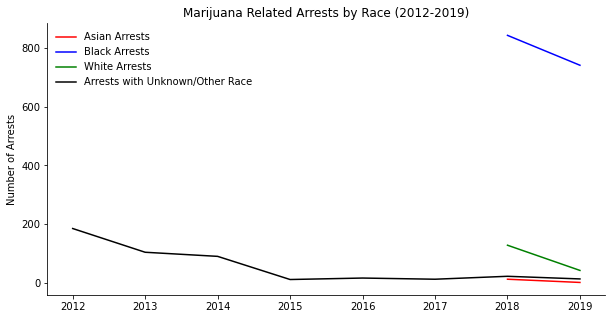

In [15]:
# Plot arrests by race
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(asian.index, asian['Total Arrests'], color = 'red', label = 'Asian Arrests')
ax.plot(black.index, black['Total Arrests'], color = 'blue', label = 'Black Arrests')
ax.plot(white.index, white['Total Arrests'], color = 'green', label = 'White Arrests')
ax.plot(unknown.index, unknown['Total Arrests'], color = 'black', label = 'Arrests with Unknown/Other Race')

ax.set_title('Marijuana Related Arrests by Race (2012-2019)')
ax.set_ylabel('Number of Arrests')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend(frameon=False)

plt.show()

In [30]:
# Consolidate data for cultivation arrests

cultivation = data1[data1['Arrest Type'] == 'Cultivation']
cultivation = cultivation.groupby(['Year']).agg(len)
cultivation = cultivation.drop(['Adult/Juvenile', 'Age', 'Defendant Race', 'Defendant Sex', 'Charge Description'], axis = 1)
cultivation = cultivation.rename(columns = {'Arrest Type': 'Total Arrests'})
cultivation

,Total Arrests
Year,
2019,1


In [31]:
# Consolidate data for manufacturing arrests

man = data1[data1['Arrest Type'] == 'Manufacture']
man = man.groupby(['Year']).agg(len)
man = man.drop(['Adult/Juvenile', 'Age', 'Defendant Race', 'Defendant Sex', 'Charge Description'], axis = 1)
man = man.rename(columns = {'Arrest Type': 'Total Arrests'})
man

,Total Arrests
Year,
2019,1


In [32]:
# Consolidate data for Distribution arrests

dist = data1[data1['Arrest Type'] == 'Distribution']
dist = dist.groupby(['Year']).agg(len)
dist = dist.drop(['Adult/Juvenile', 'Age', 'Defendant Race', 'Defendant Sex', 'Charge Description'], axis = 1)
dist = dist.rename(columns = {'Arrest Type': 'Total Arrests'})
dist

,Total Arrests
Year,
2012,146
2013,83
2014,109
2015,75
2016,215
2017,403
2018,286
2019,345


In [34]:
# Consolidate data for possession with intent to distribute arrests

possd = data1[data1['Arrest Type'] == 'Possession with intent to distribute']
possd = possd.groupby(['Year']).agg(len)
possd = possd.drop(['Adult/Juvenile', 'Age', 'Defendant Race', 'Defendant Sex', 'Charge Description'], axis = 1)
possd = possd.rename(columns = {'Arrest Type': 'Total Arrests'})
possd

,Total Arrests
Year,
2012,798
2013,672
2014,513
2015,139
2016,163
2017,239
2018,499
2019,367


In [35]:
# Consolidate data for possession arrests

poss = data1[data1['Arrest Type'] == 'Possession']
poss = poss.groupby(['Year']).agg(len)
poss = poss.drop(['Adult/Juvenile', 'Age', 'Defendant Race', 'Defendant Sex', 'Charge Description'], axis = 1)
poss = poss.rename(columns = {'Arrest Type': 'Total Arrests'})
poss

,Total Arrests
Year,
2012,2602
2013,1963
2014,1432
2015,24
2016,16
2017,19
2018,26
2019,26


In [37]:
# Consolidate data for public consumption arrests

cons = data1[data1['Arrest Type'] == 'Public consumption']
cons = cons.groupby(['Year']).agg(len)
cons = cons.drop(['Adult/Juvenile', 'Age', 'Defendant Race', 'Defendant Sex', 'Charge Description'], axis = 1)
cons = cons.rename(columns = {'Arrest Type': 'Total Arrests'})
cons

,Total Arrests
Year,
2014,99
2015,85
2016,282
2017,265
2019,100


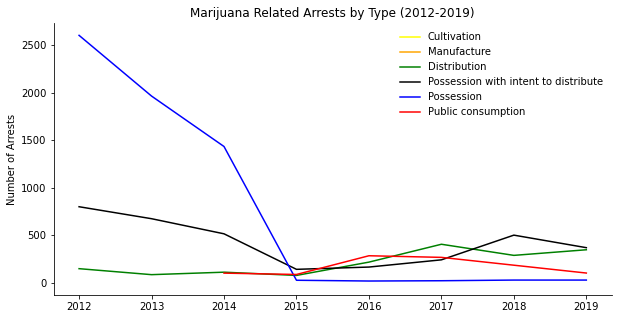

In [44]:
# Plot arrests by arrest type
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(cultivation.index, cultivation['Total Arrests'], color = 'yellow', label = 'Cultivation')
ax.plot(man.index, man['Total Arrests'], color = 'orange', label = 'Manufacture')
ax.plot(dist.index, dist['Total Arrests'], color = 'green', label = 'Distribution')
ax.plot(possd.index, possd['Total Arrests'], color = 'black', label = 'Possession with intent to distribute')
ax.plot(poss.index, poss['Total Arrests'], color = 'blue', label = 'Possession')
ax.plot(cons.index, cons['Total Arrests'], color = 'red', label = 'Public consumption')

ax.set_title('Marijuana Related Arrests by Type (2012-2019)')
ax.set_ylabel('Number of Arrests')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend(frameon=False)

plt.show()